<h2>Unsupervised Learning - Object Recognition using Silhoutte Vehicle Data  </h2>

<h3> 1. OVERVIEW </h3>

Object recognition is a general term to describe a collection of related computer vision tasks that involve identifying objects represeted as digital features.

<li> Image classification involves predicting the class of one object in an image. </li>
<li> Object localization refers to identifying the location of one or more objects in an image and drawing abounding box around their extent. </li> 
<li> Object detection combines these two tasks and localizes and classifies one or more objects in an image. </li>

When a user or practitioner refers to “object recognition“, they often mean “object detection“.

*... we will be using the term object recognition broadly to encompass both image classification (a task requiring an algorithm to determine what object classes are present in the image) as well as object detection (a task requiring an algorithm to localize all objects present in the image) ...*
                &emsp; — ImageNet Large Scale Visual Recognition Challenge, 2015. 

From this breakdown, we can see that object recognition refers to a suite of challenging computer vision tasks

![alt text](temp.png "Object Recognition")

<h3>ABOUT THE DATA: </h3>

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The images were acquired by a camera looking downwards at the model vehicle from a fixed angle of elevation (34.2 degrees to the horizontal). The vehicles were placed on a diffuse backlit surface (lightbox). The vehicles were painted matte black to minimise highlights. The images were captured using a CRS4000 framestore connected to a vax 750. All images were captured with a spatial resolution of 128x128 pixels quantised to 64 greylevels. These images were thresholded to produce binary vehicle silhouettes, negated (to comply with the processing requirements of BINATTS) and thereafter subjected to shrink-expand-expand-shrink HIPS modules to remove "salt and pepper" image noise.

The vehicles were rotated and their angle of orientation was measured using a radial graticule beneath the vehicle. 0 and 180 degrees corresponded to "head on" and "rear" views respectively while 90 and 270 corresponded to profiles in opposite directions. Two sets of 60 images, each set covering a full 360 degree rotation, were captured for each vehicle. The vehicle was rotated by a fixed angle between images. These datasets are known as e2 and e3 respectively.

A further two sets of images, e4 and e5, were captured with the camera at elevations of 37.5 degs and 30.8 degs respectively. These sets also contain 60 images per vehicle apart from e4.van which contains only 46 owing to the difficulty of containing the van in the image at some orientations.

<ol> 
    <li> COMPACTNESS (average perim)**2/area </li>
    <li> CIRCULARITY (average radius)**2/area </li>
    <li> DISTANCE CIRCULARITY area/(av.distance from border)**2 </li>
    <li> RADIUS RATIO (max.rad-min.rad)/av.radius </li>
    <li> PR.AXIS ASPECT RATIO (minor axis)/(major axis) </li>
    <li> MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length) </li>
    <li> SCATTER RATIO (inertia about minor axis)/(inertia about major axis) </li>
    <li> ELONGATEDNESS area/(shrink width)**2 </li>
    <li> PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width) </li>
    <li> MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this). </li>
    <li> SCALED VARIANCE (2nd order moment about minor axis)/area ALONG MAJOR AXIS </li>
    <li> SCALED VARIANCE (2nd order moment about major axis)/area ALONG MINOR AXIS </li>
    <li> SCALED RADIUS OF GYRATION (mavar+mivar)/area </li>     
    <li> SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3 MAJOR AXIS </li>
    <li> KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4 MINOR AXIS </li> 
    <li> KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4MAJOR AXIS </li> 
    <li> HOLLOWS RATIO (area of hollows)/(area of bounding polygon) </li> 
    Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.

NUMBER OF CLASSES
4 OPEL, SAAB, BUS, VAN

<h3>CONTEXT </h3>
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles:

<h3> OBJECTIVE </h3>
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.
<ol> 
    <li> Data Preprocessing </li>
    <li> Understanding the Attributes </li>
    <li> Split the data into train and test </li>
    <li> Train a Support vector machine using the train set and get the accuracy on the test set</li>
    <li> Perform K-fold cross validation and get the cross validation score of the model </li>
    <li> Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data </li>
    <li> Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. </li>
    <li> Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings </li>
</ol> 

<h3> 1. IMPORT THE NECESSARY LIBRARIES </h3>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import nltk
import sklearn
import warnings 
warnings.filterwarnings('ignore')

#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#from sklearn.preprocessing import scale
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

from scipy import stats
from scipy.stats import zscore
#from sklearn import tree
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn import model_selection

<h3> 2. LOAD THE DATA </h3>
<li> Import the dataset and read into a dataframe </li>

In [134]:
vehicle_df = pd.read_csv('vehicle.csv')

<h3> 3. EYEBALL THE RAW DATA </h3>
We will review the dataset for dimension, column description and ensure that all attributes are understood well.
<li> Rename the dataframe columns to facilitate easy reference and access.  </li>
<li> Check dimensions (shape) of data </li>
<li> Check Information about the data and  datatypes of the  respective attributes.</li>
<li> Check for missing values in the dataset. </li>
<li> Check for negative values in the dataset. </li>
<li> Check for duplicate values in the dataset. </li>
<li> Review the Target value distribution</li>
<li> Review the 5-point summary</li>
<li> Review the Variable Categories and Data Types. </li>
<li> Conclude raw data analysis with a Profile Report</li>

<h5> a. Rename the dataframe columns </h5>

In [135]:
vehicle_df.rename(columns = {'compactness' :'compact', 
                               'circularity':'circle',
                               'distance_circularity': 'dcircle',
                               'radius_ratio': 'rr',
                               'pr.axis_aspect_ratio':'p_ratio',
                               'max.length_aspect_ratio':'max_ratio',
                               'scatter_ratio':'scatter',
                               'elongatedness': 'elong',
                               'pr.axis_rectangularity': 'p_rect',
                               'max.length_rectangularity': 'max_rect',
                               'scaled_variance': 'svar',
                               'scaled_variance.1': 'svar1',
                               'scaled_radius_of_gyration': 's_gyr',
                               'scaled_radius_of_gyration.1': 's_gyr1',
                               'skewness_about' : 'skew',
                               'skewness_about.1': 'skew1',
                               'skewness_about.2': 'skew2',
                               'hollows_ratio' : 'hollow',
                               'class' : 'class'                                
                              }, inplace = True)

In [136]:
#display the first 5 rows of the dataframe
pd.set_option('display.max_columns', 25)
vehicle_df.head()

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


<h5>b. Shape of Data </h5>

In [137]:
# Display the shape of the data
vehicle_df.shape 

(846, 19)

<h5>c. Information about the DataFrame </h5>

In [138]:
# Display information about the dataframe for data type of each of the variable, number of values entered in each of the variables
vehicle_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   compact    846 non-null    int64  
 1   circle     841 non-null    float64
 2   dcircle    842 non-null    float64
 3   rr         840 non-null    float64
 4   p_ratio    844 non-null    float64
 5   max_ratio  846 non-null    int64  
 6   scatter    845 non-null    float64
 7   elong      845 non-null    float64
 8   p_rect     843 non-null    float64
 9   max_rect   846 non-null    int64  
 10  svar       843 non-null    float64
 11  svar1      844 non-null    float64
 12  s_gyr      844 non-null    float64
 13  s_gyr1     842 non-null    float64
 14  skew       840 non-null    float64
 15  skew1      845 non-null    float64
 16  skew2      845 non-null    float64
 17  hollow     846 non-null    int64  
 18  class      846 non-null    object 
dtypes: float64(14), int64(4), object(1)
memory usage: 

*We observe that except for the feature "class", all other df columns are numeric either an integer or float data type. There are null values in some columns as well. Thus "class" is the target column in this dataset*  

<h5>d. Check for missing values in the dataset </h5>

In [139]:
vehicle_df.isnull().apply(pd.value_counts)   #null value check

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow,class
False,846.0,841,842,840,844,846.0,845,845,843,846.0,843,844,844,842,840,845,845,846.0,846.0
True,NaN,5,4,6,2,NaN,1,1,3,NaN,3,2,2,4,6,1,1,NaN,NaN


In [140]:
#Alternate way to determine the number of missing values in each feature
pd.DataFrame(vehicle_df.isnull().sum(),columns=['Number of mIssing Values']).T #No: of missing values

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow,class
Number of mIssing Values,0,5,4,6,2,0,1,1,3,0,3,2,2,4,6,1,1,0,0


In [141]:
#Total number of Missing Values in the dataset
vehicle_df.isnull().sum().sum() 

41

*From the above null value check, we observe that "radius_ratio" & "skewness_about" have 6 missing  values, "circularity" has 5 missing and 12 other features have missing values. We have to treat the missing values as most ML models do no handle them well. Either we could drop those 41 observations that contain missing values or you could impute for the missing values. Since we will lose valuable  information if we just drop rows or columns that contain null values, we will impute them with median values later during preprocessing.* 

<h5>e. 5-point Summary </h5>

*To view the location of the observations(from the median), range of the observations (from the min and max), spread of the observations (from the quartiles) in the dataset, we will display the 5-point summary.*

In [142]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compact,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circle,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
dcircle,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
rr,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
p_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elong,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
p_rect,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max_rect,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


<h5>f. Check for negative values in the dataset </h5>

In [143]:
## A quick check for any negative values in the dataset
vehicle_negative_df = vehicle_df.drop(['class'],axis=1)
vehicle_negative_df.iloc[:,0:].lt(0).sum()

compact      0
circle       0
dcircle      0
rr           0
p_ratio      0
max_ratio    0
scatter      0
elong        0
p_rect       0
max_rect     0
svar         0
svar1        0
s_gyr        0
s_gyr1       0
skew         0
skew1        0
skew2        0
hollow       0
dtype: int64

<h5>g. Check for Duplicates in the dataset </h5>

In [144]:
duplicateRowsDF = vehicle_df[vehicle_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [compact, circle, dcircle, rr, p_ratio, max_ratio, scatter, elong, p_rect, max_rect, svar, svar1, s_gyr, s_gyr1, skew, skew1, skew2, hollow, class]
Index: []


<h5>h. Check for Target value distribution </h5>

In [145]:
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

*The 'Vehicle' dataset contains 429 Car, 218 Bus and 199 Van data observations.*

<h4> Profile Report (Observations) </h4>
<li> Silhouette Vehicle dataset contains 846 Observations/Rows AND 19 Attributes/Columns </li>
<li> Dataset contains Numeric variables of Integer and Float datatypes and one object type </li>
<li> Most Numerical attributes in the dataset have Null or Missing values </li>
<li> Dataset does not contains any duplicate rows </li>
<li> Dataset does not contains any negative values </li>
<li> Target value distribution contains 429 'car', 218 'bus' & 199 'van' data observations </li>

<h3> 4. DATA PRE-PROCESSING </h3>

We will need to preprocess the data to:
<li> Identify the Outliers and treat Outliers </li>
<li> Treat for Missing values </li>

<h5>a. Identify and Treat Outliers </h5>
For this purpose we will study the data distribution of each attribute and use a "distplot", a "box" plot and skewness measure to understand the data distributed and symmetry. Further we will compute the outliers for the column. 

***Distribution Plot Analysis.***

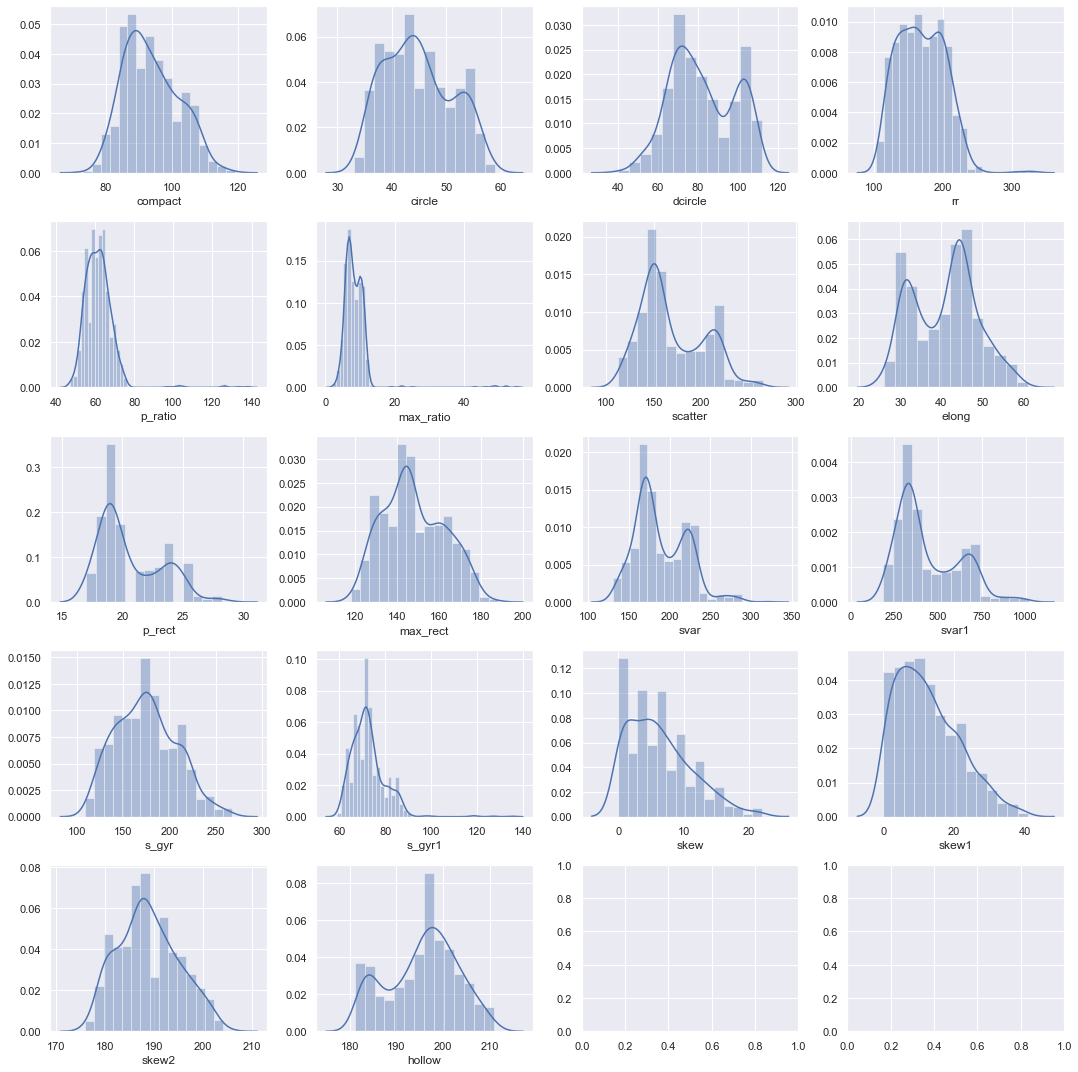

In [146]:
fig,axes=plt.subplots(5,4,figsize=(15,15))
axes=axes.flatten()

for j in range(0,len(vehicle_df.columns)):
    col = vehicle_df.columns.values[j]
    #print (col)
    
    if col == "class":
        #print(col.replace(col,"Error"))
           pass
       
    else:
            sns.distplot(vehicle_df.iloc[:,j], ax=axes[j], hist=True, kde=True)
     
plt.tight_layout()
plt.show()

***Box Plot Analysis.***

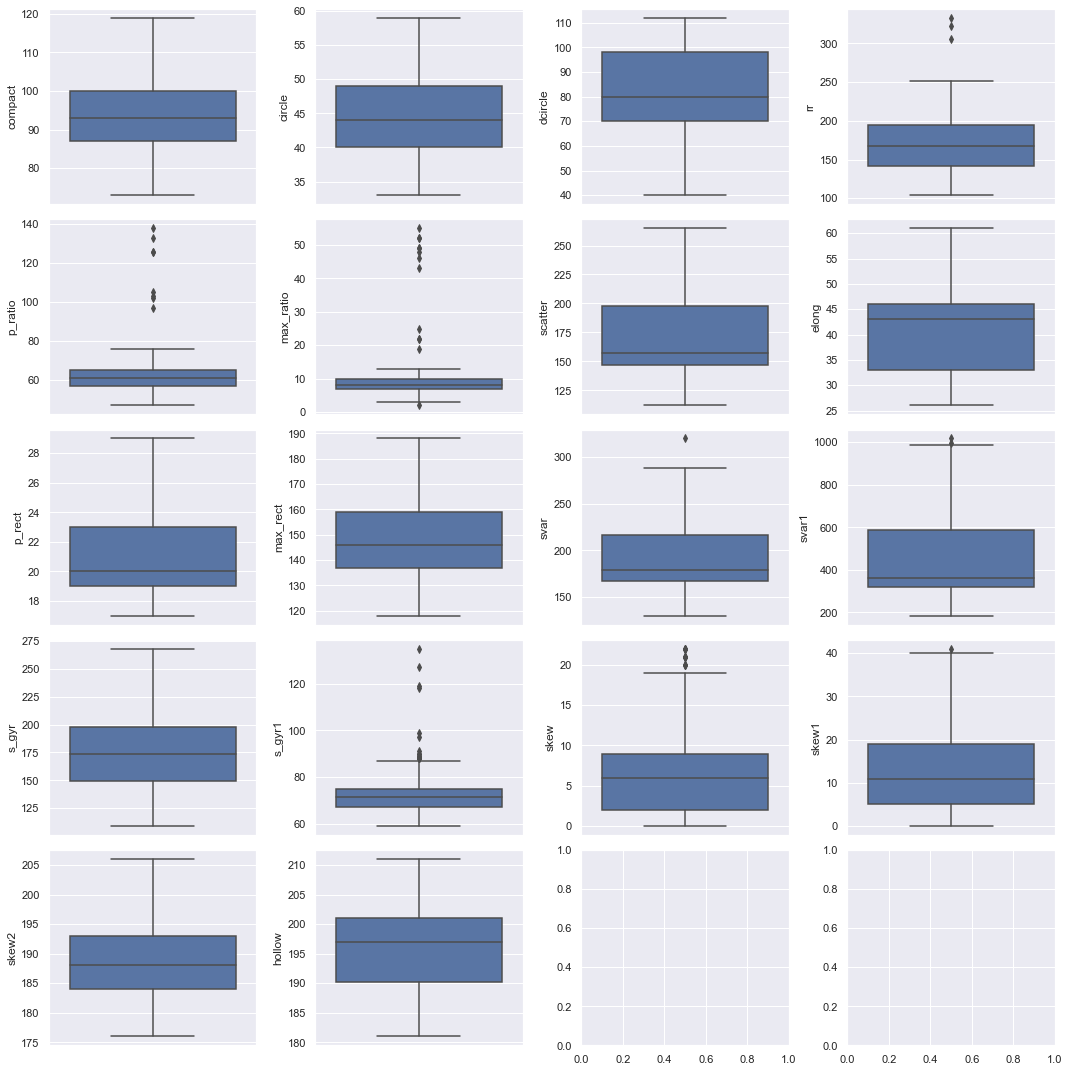

In [147]:
fig,axes=plt.subplots(5,4,figsize=(15,15))
axes=axes.flatten()

for j in range(0,len(vehicle_df.columns)):
    col = vehicle_df.columns.values[j]
    # print (col)
    
    if col == "class":
        #print(col.replace(col,"Error"))
           pass
       
    else:
            sns.boxplot(y=vehicle_df.iloc[:,j],data=vehicle_df, orient='v',ax=axes[j])
     
plt.tight_layout()
plt.show()

In [148]:
# Skewness masure for all the Attributes
vehicle_df.skew()

compact      0.381271
circle       0.261809
dcircle      0.106585
rr           0.394978
p_ratio      3.830362
max_ratio    6.778394
scatter      0.607271
elong        0.047847
p_rect       0.770889
max_rect     0.256359
svar         0.651598
svar1        0.842034
s_gyr        0.279317
s_gyr1       2.083496
skew         0.776519
skew1        0.688017
skew2        0.249321
hollow      -0.226341
dtype: float64

***Data Distribution Analysis.***
From above we can see that there are:
<li> No outliers in compactness column and it's looks like normally distributed. </li>
<li> No outliers in circularity column and it's looks like normally distributed </li>
<li> No outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median) </li>
<li> <b> Outliers </b> in radius_ratio column and there is right skewness because long tail is at the right side(mean>median) </li>
<li> <b> Outliers </b>in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median) </li>
<li> <b> Outliers </b> in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median) </li>
<li> No outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median) </li>
<li> No outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean less than median) </li>
<li> No outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median) </li>
<li> No outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median) </li>
<li> <b> Outliers </b>in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median) </li>
<li> <b> Outliers </b>in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median) </li>
<li> No outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median) </li>
<li> <b> Outliers </b>in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median) </li>
<li> <b> Outliers </b> in skewness_about column and there is right skewness because long tail is at right side(mean>median) </li>
<li> <b> Outliers </b>in skewness_about.1 column and there is right skewness because long tail is at right side(mean>median) </li>
<li> No outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean less than median) </li>
<li> No outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean less than median) </li>

In [149]:
vehicle_df.describe()

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [150]:
#Make a copy of the dataframe before dropping null/missing values 
new_vehicle_df = vehicle_df.copy()

In [151]:
#Display the shape of the newly copied dataframe
print("Shape of newly created dataframe:",new_vehicle_df.shape)

Shape of newly created dataframe: (846, 19)


In [152]:
#Drop the null vaues from the new dataframe
new_vehicle_df.dropna(axis=0,inplace=True)

In [153]:
#Shape of the dataframe after treating missing values
print("After dropping missing values shape of dataframe:",new_vehicle_df.shape)

After dropping missing values shape of dataframe: (813, 19)


In [156]:
# Computing the z_score and outlier flag for the identified columns from Box plot adn appending them to the dataframe 
pd.set_option('display.max_columns',100)
#cols_list  = list(silhouette_df.columns)
cols_zlist = list(new_vehicle_df[['rr', 'p_ratio', 'max_ratio', 'svar', 'svar1', 's_gyr1', 'skew', 'skew1']])
#cols_list.remove('class')
for col in cols_zlist:
    col_zscore = col + '_zscore'
    col_outlier = col + '_outlier'
    new_vehicle_df[col_zscore] = (new_vehicle_df[col] - new_vehicle_df[col].mean())/new_vehicle_df[col].std(ddof=0)
    new_vehicle_df[col_outlier] = (abs(new_vehicle_df[col_zscore])>3).astype(int)
new_vehicle_df

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow,class,rr_zscore,rr_outlier,p_ratio_zscore,p_ratio_outlier,max_ratio_zscore,max_ratio_outlier,svar_zscore,svar_outlier,svar1_zscore,svar1_outlier,s_gyr1_zscore,s_gyr1_outlier,skew_zscore,skew_outlier,skew1_zscore,skew1_outlier
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0.264970,0,1.283254,0,0.299721,0,-0.397397,0,-0.339014,0,-0.321192,0,-0.071523,0,0.371287,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,-0.836393,0,-0.599253,0,0.085785,0,-0.590034,0,-0.618754,0,-0.053505,0,0.538425,0,0.147109,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1.187734,0,0.530251,0,0.299721,0,1.111591,0,1.122486,0,0.080339,0,1.555006,0,-0.413338,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,-0.300595,0,0.153750,0,0.085785,0,-0.911095,0,-0.738643,0,-1.258099,0,-0.071523,0,-0.301249,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,1.068668,0,5.173770,1,9.285029,1,1.689501,0,-0.647299,0,7.307905,1,0.538425,0,-0.189159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car,0.413803,0,0.279250,0,-0.128151,0,0.373150,0,-0.093528,0,-0.053505,0,0.131793,0,1.380091,0
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van,-0.181529,0,0.530251,0,0.513657,0,-0.493716,0,-0.401813,0,-0.053505,0,-1.088104,0,0.819644,0
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car,1.574700,0,0.655752,0,0.727593,0,1.272121,0,1.613458,0,-0.321192,0,-0.681472,0,-0.973784,0
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car,-0.687560,0,-0.473753,0,-0.342087,0,-1.071626,0,-0.961293,0,-0.856567,0,-1.291420,0,1.380091,0


In [160]:
#Filtering the radius_ratio outliers from the dataframe 
new_vehicle_df = new_vehicle_df[new_vehicle_df.rr_outlier == 0]
new_vehicle_df.shape

(810, 35)

In [161]:
#Filtering the pr.axis_aspect_ratio outliers from the dataframe
new_vehicle_df = new_vehicle_df[new_vehicle_df.p_ratio_outlier == 0]
new_vehicle_df.shape

(805, 35)

In [162]:
#Filtering the max.length_aspect_ratio outliers from the dataframe
new_vehicle_df = new_vehicle_df[new_vehicle_df.max_ratio_outlier == 0]
new_vehicle_df.shape

(804, 35)

In [163]:
#Filtering the scaled_variance outliers from the dataframe
new_vehicle_df = new_vehicle_df[new_vehicle_df.svar_outlier == 0]
new_vehicle_df.shape

(800, 35)

In [164]:
#Filtering the scaled_variance.1 outliers from the dataframe
new_vehicle_df = new_vehicle_df[new_vehicle_df.svar1_outlier == 0]
new_vehicle_df.shape

(799, 35)

In [165]:
#Filtering the scaled_radius_of_gyration.1 outliers from the dataframe
new_vehicle_df = new_vehicle_df[new_vehicle_df.s_gyr1_outlier == 0]
new_vehicle_df.shape

(799, 35)

In [166]:
#Filtering the skewness_about outliers from the dataframe
new_vehicle_df = new_vehicle_df[new_vehicle_df.skew_outlier == 0]
new_vehicle_df.shape

(795, 35)

In [168]:
#Filtering the skewness_about1 outliers from the dataframe
new_vehicle_df = new_vehicle_df[new_vehicle_df.skew1_outlier == 0]
new_vehicle_df.shape

(793, 35)

In [169]:
# Dataframe after removing the outlier records
new_vehicle_df

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow,class,rr_zscore,rr_outlier,p_ratio_zscore,p_ratio_outlier,max_ratio_zscore,max_ratio_outlier,svar_zscore,svar_outlier,svar1_zscore,svar1_outlier,s_gyr1_zscore,s_gyr1_outlier,skew_zscore,skew_outlier,skew1_zscore,skew1_outlier
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0.264970,0,1.283254,0,0.299721,0,-0.397397,0,-0.339014,0,-0.321192,0,-0.071523,0,0.371287,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,-0.836393,0,-0.599253,0,0.085785,0,-0.590034,0,-0.618754,0,-0.053505,0,0.538425,0,0.147109,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1.187734,0,0.530251,0,0.299721,0,1.111591,0,1.122486,0,0.080339,0,1.555006,0,-0.413338,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,-0.300595,0,0.153750,0,0.085785,0,-0.911095,0,-0.738643,0,-1.258099,0,-0.071523,0,-0.301249,0
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus,0.116137,0,0.404751,0,-0.556023,0,-0.397397,0,-0.441776,0,-0.856567,0,1.351690,0,-1.310052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car,0.413803,0,0.279250,0,-0.128151,0,0.373150,0,-0.093528,0,-0.053505,0,0.131793,0,1.380091,0
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van,-0.181529,0,0.530251,0,0.513657,0,-0.493716,0,-0.401813,0,-0.053505,0,-1.088104,0,0.819644,0
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car,1.574700,0,0.655752,0,0.727593,0,1.272121,0,1.613458,0,-0.321192,0,-0.681472,0,-0.973784,0
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car,-0.687560,0,-0.473753,0,-0.342087,0,-1.071626,0,-0.961293,0,-0.856567,0,-1.291420,0,1.380091,0


In [170]:
# Removing the unwanted z_score and outlier columns from the dataframe
for col1 in new_vehicle_df.columns:
    if col1 == "class":
       # print ("Hello")
       pass
    elif "zscore" in col1 :
          #print("Hello")
          new_vehicle_df  = new_vehicle_df.drop(columns=[col1])
    elif "outlier" in col1 :
          #print("Hello")
          new_vehicle_df  = new_vehicle_df.drop(columns=[col1])
    else:
        pass

In [172]:
# Dataframe after removing the z_score and outlier_columns
# This is the dataframe after preprocessing
new_vehicle_df

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


<h3> 5. CORRELATION ANALYSIS (Study of All Variables and their Relationships) </h3>

<AxesSubplot:>

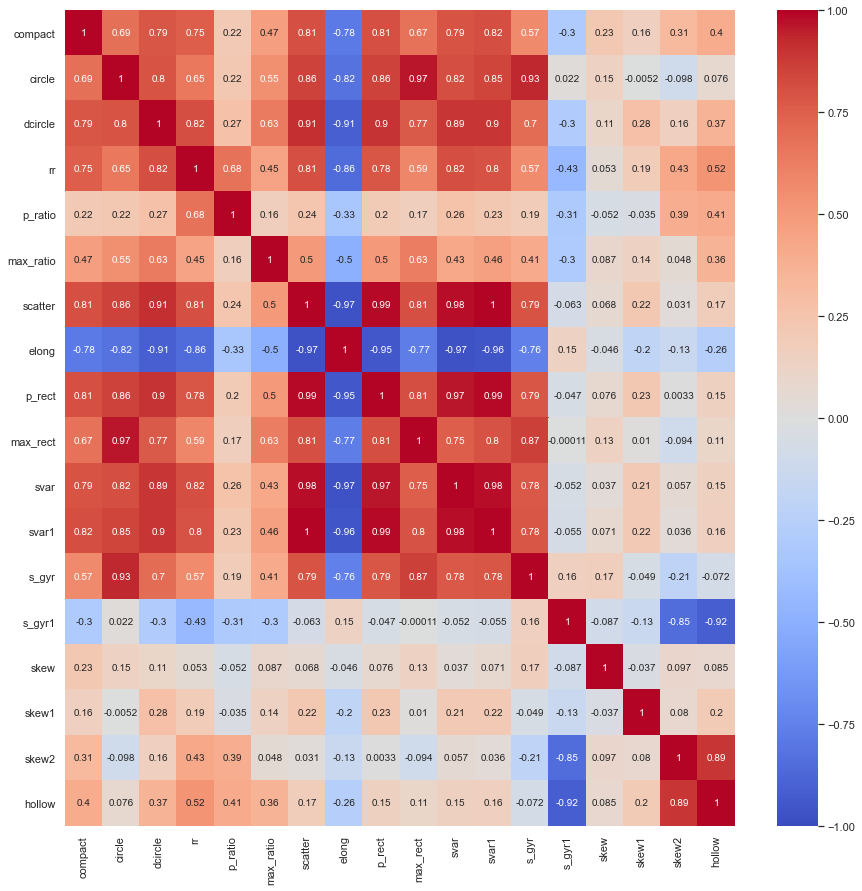

In [176]:
# Finding the Pairwise Correlation with heat map
corr = new_vehicle_df.drop(['class'], axis = 1).corr()
plt.figure(figsize = (15,15))
sns.heatmap(new_vehicle_df.corr(), annot = True, vmin = -1, vmax = 1, center = 0, cmap="coolwarm")

In [177]:
# Finding the Pairwise Correlation with corr()
new_vehicle_df.corr()

,compact,circle,dcircle,rr,p_ratio,max_ratio,scatter,elong,p_rect,max_rect,svar,svar1,s_gyr,s_gyr1,skew,skew1,skew2,hollow
compact,1.000000,0.685546,0.787905,0.751357,0.215793,0.474552,0.809808,-0.784197,0.810063,0.673129,0.790652,0.817214,0.574083,-0.299363,0.225471,0.162324,0.314299,0.399854
circle,0.685546,1.000000,0.795443,0.653723,0.224077,0.547158,0.856360,-0.822099,0.855269,0.965926,0.816637,0.850180,0.934706,0.022263,0.145705,-0.005227,-0.097961,0.075597
dcircle,0.787905,0.795443,1.000000,0.820129,0.267305,0.633659,0.911884,-0.911878,0.901223,0.771262,0.893300,0.897083,0.702972,-0.295149,0.108405,0.275624,0.158897,0.365092
rr,0.751357,0.653723,0.820129,1.000000,0.675270,0.447845,0.809070,-0.856698,0.782551,0.587674,0.817934,0.802275,0.568230,-0.430497,0.052933,0.189616,0.429302,0.524133
p_ratio,0.215793,0.224077,0.267305,0.675270,1.000000,0.164104,0.235760,-0.331441,0.202330,0.169256,0.259857,0.226358,0.189446,-0.309174,-0.052038,-0.034520,0.394867,0.407369
max_ratio,0.474552,0.547158,0.633659,0.447845,0.164104,1.000000,0.495444,-0.495041,0.495879,0.626367,0.429083,0.463595,0.413605,-0.304247,0.086607,0.138697,0.048255,0.361048
scatter,0.809808,0.856360,0.911884,0.809070,0.235760,0.495444,1.000000,-0.974965,0.991723,0.808961,0.980675,0.996649,0.789313,-0.063092,0.068254,0.222736,0.030960,0.172120
elong,-0.784197,-0.822099,-0.911878,-0.856698,-0.331441,-0.495041,-0.974965,1.000000,-0.952007,-0.769074,-0.970513,-0.960094,-0.757594,0.146930,-0.046128,-0.197794,-0.134563,-0.258950
p_rect,0.810063,0.855269,0.901223,0.782551,0.202330,0.495879,0.991723,-0.952007,1.000000,0.814052,0.966385,0.991906,0.786685,-0.046983,0.076403,0.225970,0.003329,0.151696
max_rect,0.673129,0.965926,0.771262,0.587674,0.169256,0.626367,0.808961,-0.769074,0.814052,1.000000,0.753975,0.798652,0.865566,-0.000114,0.133056,0.010143,-0.094112,0.108553


<AxesSubplot:>

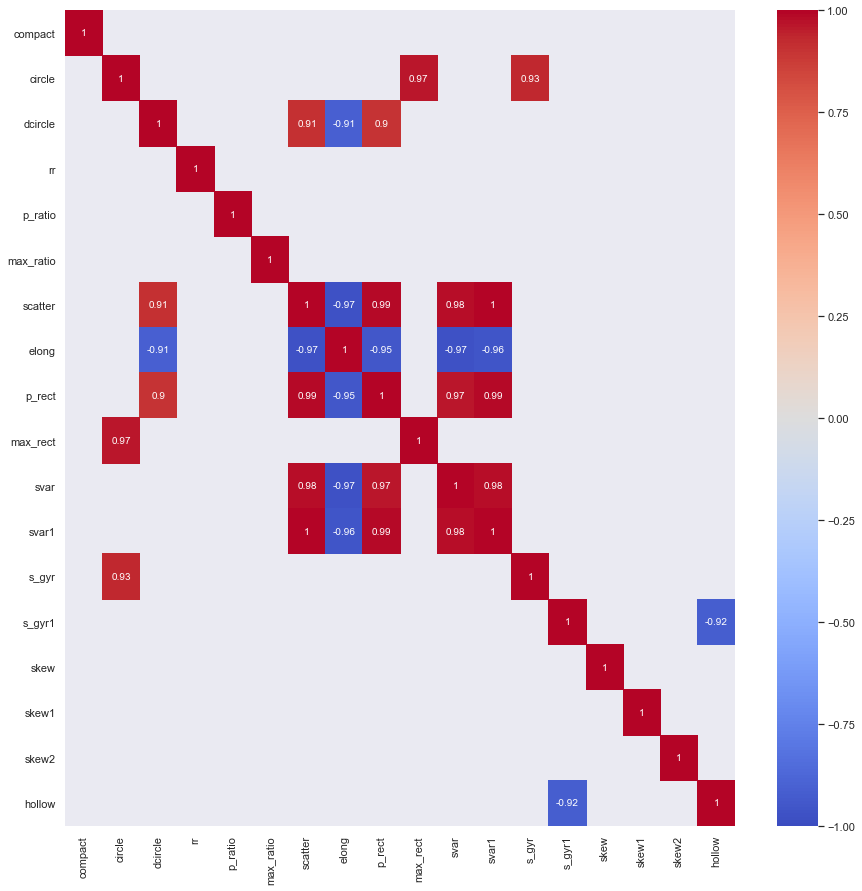

In [180]:
#Correlation with Heatmap after masking absolute coefficieints < .9 
corr_pos = corr.abs()
mask = (corr_pos < 0.9 ) 
fig, ax = plt.subplots(figsize = [15,15])
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, center = 0, mask = mask, cmap="coolwarm")

<h4> Correlation Analysis Summary </h4>

Our objective is to reocgnize whether an object is a van or a bus or a car based on certain input features. Main assumption in the modelling is that there is little or no multicollinearity between the features. If two features are highly correlated then there is no use in accounting for both features. We can will hence one of those feature in such cases.

The Correlation analysis via heatmap and corr() gives us the correlation matrix from we can deduce those features that are highly correlated. We will try to isolate those feature correlation which have a coeffecieint of .9 and above.


From the above Heatmap Correlation analysis we can conclude that

***Scatter Ratio correlation*** 
    <li> Scaled_Variance.1 and Scatter_Ratio are highly correlated with a coefficient of 1. So we will drop one of them.</li>
    <li> Scaled_Variance and Scatter_Ratio are highly correlated with a coefficient of 0.98. So we will drop one of them.</li>    
    <li> Distance_Circuilarity and Scatter_Ratio are highly correlated with a coefficient of 0.91. So we will drop one of them.</li>
    <li> pr.axis_rectangularity and Scatter_Ratio are highly correlated with a coefficient of 0.99. So we will drop one of them.</li>
    <li> Elongatedness and Scatter_Ratio are highly correlated with a coefficient of -0.97. So we will drop one of them.</li>

***Elongatedness Correlation***
    <li> Distance Circuilarity and Elongatedness are highly correlated with a coefficient of 0.91. So we will drop one of them.</li>  
    <li> pr.axis_rectangularity and Elongatedness are highly correlated with a coefficient of -0.95. So we will drop one of them.</li>  
    <li> Scaled_Variance and Elongatedness are highly correlated with a coefficient of -0.97. So we will drop one of them.</li>  
    <li> Scaled_Variance.1 and Elongatedness are highly correlated with a coefficient of -0.96. So we will drop one of them.</li>

***pr.axis_rectangularity Correlation***
    <li> Scaled_Variance and pr.axis_rectangularity are highly correlated with a coefficient of 0.97. So we will drop one of them. </li>
    <li> Scaled_Variance.1 and pr.axis_rectangularity are highly correlated with a coefficient of 0.99. So we will drop one of them. </li>
    <li> Distance_Circuilarity and pr.axis_rectangularity are highly correlated with a coefficient of 0.91. So we will drop one of them. </li>   
    <li> Circuilarity and max.length_rectangularity are highly correlated with a coefficient of 0.97. So we will drop one of them. </li>

***Scaled_Variance Correlation***
    <li> Scaled_Variance_1 and Scaled_Variance are highly correlated with a coefficient of 0.98. So we will drop one of them. </li>
    
***Circuilarity Correaltion***    
    <li> Circuilarity and scaled_radius_of_gyration are highly correlated with a coefficient of 0.93. So we will drop one of them. </li>       
    <li> Circuilarity and max.length_aspect_ratio are highly correlated with a coefficient of 0.93. So we will drop one of them. </li>

***Scaled_radius_gyration.1 Correlation***
    <li> Hollow and scaled_radius_of_gyration are highly correlated with a coefficient of -0.92. So we will drop one of them. </li>       


So we will drop the following features from the final dataset.
- Scatter Ratio
- Elongatedness
- pr.axis_rectangularity 
- Scaled_variance
- Circuilarity
- Scaled_radius_gyration.1

<h5> Feature Selction for Correlation </h5>

In [188]:
# Identify Highly Correlated Features programmatically
# Create correlation matrix
new1_vehicle_df = new_vehicle_df.drop(['class'], axis=1)
corr_matrix = new1_vehicle_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than or equal to 0.9
to_drop = [column for column in upper.columns if any(upper[column] >= 0.90)]
to_drop

['scatter', 'elong', 'p_rect', 'max_rect', 'svar', 'svar1', 's_gyr', 'hollow']

In [193]:
# Drop the Highly Correlated Features
new1_vehicle_df = new_vehicle_df.drop(new_vehicle_df[to_drop], axis=1)
new1_vehicle_df.shape

(793, 11)

<h5> This is the final dataset for training a SVM model </h5>

<h3> 6. SPLIT THE DATA INTO TRAIN AND TEST </h3>

In [205]:
raw_vehicle_df = new1_vehicle_df

In [206]:
#Shape of raw data
raw_vehicle_df.shape

(793, 11)

In [207]:
#Display the raw vehicle dataset
raw_vehicle_df

,compact,circle,dcircle,rr,p_ratio,max_ratio,s_gyr1,skew,skew1,skew2,class
0,95,48.0,83.0,178.0,72.0,10,70.0,6.0,16.0,187.0,van
1,91,41.0,84.0,141.0,57.0,9,72.0,9.0,14.0,189.0,van
2,104,50.0,106.0,209.0,66.0,10,73.0,14.0,9.0,188.0,car
3,93,41.0,82.0,159.0,63.0,9,63.0,6.0,10.0,199.0,van
6,97,43.0,73.0,173.0,65.0,6,66.0,13.0,1.0,200.0,bus
...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,72.0,7.0,25.0,188.0,car
842,89,46.0,84.0,163.0,66.0,11,72.0,1.0,20.0,186.0,van
843,106,54.0,101.0,222.0,67.0,12,70.0,3.0,4.0,187.0,car
844,86,36.0,78.0,146.0,58.0,7,66.0,0.0,25.0,190.0,car


In [210]:
from sklearn.model_selection import train_test_split
raw1_vehicle_df = raw_vehicle_df.drop(['class'], axis=1)
X = raw1_vehicle_df.iloc[:,:11]
y = raw_vehicle_df['class']
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=40)
print("shape of rawdata_X_train",X_Train.shape)
print("shape of rawdata_y_train",y_Train.shape)
print("shape of rawdata_X_test",X_Test.shape)
print("shape of rawdata_y_test",y_Test.shape)

shape of rawdata_X_train (555, 10)
shape of rawdata_y_train (555,)
shape of rawdata_X_test (238, 10)
shape of rawdata_y_test (238,)


<h3> 6. TRAIN A SUPPORT VECTOR MACHINE (with raw scaled data) </h3>

***Standardization of data***
When we build the model, we are left to work with different features which are in difference scales of measures. When building the the models, the estimated weights of these features will update at different rates. This will give some variation in results. Standarding the data features to the same scale will allow the models to run better with accurate results. Dataset is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula: z=x-μ/𝛔


In [214]:
# Standardizing the data with z-score
from scipy.stats import zscore
              
scaled_X_Train=X_Train.apply(zscore)         
scaled_X_Test=X_Test.apply(zscore)

In [215]:
# Scaled data
print(scaled_X_Train.shape)
print(y_Train.shape)
print(scaled_X_Test.shape)
print(y_Test.shape)

(555, 10)
(555,)
(238, 10)
(238,)


In [287]:
from sklearn.svm import SVC

#now we will train a SVM model with raw data 
svc1 = SVC() #instantiate the object

In [288]:
#fit the model on raw data
svc1.fit(scaled_X_Train,y_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [289]:
#predict the y value
y_predict = svc1.predict(scaled_X_Test)

In [290]:
#display accuracy score of both models
from sklearn.metrics import accuracy_score
print("Accuracy score with raw scaled data(10 dimension)",accuracy_score(y_Test,y_predict))
print(classification_report(y_Test,y_predict))
print(accuracy_score(y_Test,y_predict))
print(confusion_matrix(y_Test,y_predict))

Accuracy score with raw scaled data(10 dimension) 0.957983193277311
              precision    recall  f1-score   support

         bus       0.94      0.97      0.95        62
         car       0.98      0.98      0.98       119
         van       0.93      0.89      0.91        57

    accuracy                           0.96       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.96      0.96      0.96       238

0.957983193277311
[[ 60   0   2]
 [  0 117   2]
 [  4   2  51]]


<h5> Model Evaluation - SVM using Linear Kernel </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 95.79% </li>
<li>Precision is 96% </li>
<li>Recall is 96% </li>

SVM: 0.635601 (0.039742)


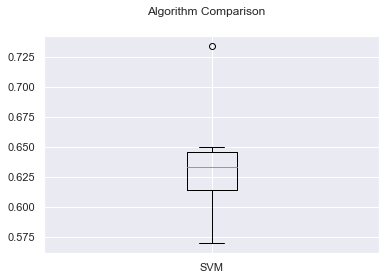

In [294]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
models = []
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h3> 7. With Principal Component Analysis(PCA) </h3>

In [251]:
# Starting with the outlier treated vehicle data
new_vehicle_df.shape

(793, 19)

In [252]:
#Split the dataframe into dependent and independent variables
new_vehicle_df_independent_attr = new_vehicle_df.drop('class',axis=1)
new_vehicle_df_dependent_attr = new_vehicle_df['class']
print("shape of impute_vehicle_df_independent_attr::",new_vehicle_df_independent_attr.shape)
print("shape of impute_vehicle_df_dependent_attr::",new_vehicle_df_dependent_attr.shape)

shape of impute_vehicle_df_independent_attr:: (793, 18)
shape of impute_vehicle_df_dependent_attr:: (793,)


In [253]:
#Scale the independent attribute and replace the dependent attr value with number
new_vehicle_df_independent_attr_scaled = new_vehicle_df_independent_attr.apply(zscore)
new_vehicle_df_dependent_attr.replace({'car':0,'bus':1,'van':2},inplace=True)

In [254]:
# Build the covariance matrix.
# We have 18 independent features so aur covariance matrix is 18*18 matrix
new_cov_matrix = np.cov(new_vehicle_df_independent_attr_scaled,rowvar=False)
print("Cov_matrix shape:",new_cov_matrix.shape)
print("Covariance_matrix",new_cov_matrix)

Cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00126263e+00  6.86411948e-01  7.88899919e-01  7.52306053e-01
   2.16065056e-01  4.75150906e-01  8.10830254e-01 -7.85187395e-01
   8.11086177e-01  6.73979151e-01  7.91649974e-01  8.18245849e-01
   5.74808344e-01 -2.99741094e-01  2.25755996e-01  1.62529040e-01
   3.14695716e-01  4.00358487e-01]
 [ 6.86411948e-01  1.00126263e+00  7.96446944e-01  6.54547966e-01
   2.24359784e-01  5.47848567e-01  8.57441729e-01 -8.23137171e-01
   8.56348525e-01  9.67146051e-01  8.17668089e-01  8.51253424e-01
   9.35885925e-01  2.22911495e-02  1.45889140e-01 -5.23338911e-03
  -9.80846209e-02  7.56923629e-02]
 [ 7.88899919e-01  7.96446944e-01  1.00126263e+00  8.21164884e-01
   2.67642402e-01  6.34458911e-01  9.13035629e-01 -9.13029738e-01
   9.02360473e-01  7.72236074e-01  8.94427981e-01  8.98215839e-01
   7.03859615e-01 -2.95521211e-01  1.08541932e-01  2.75972175e-01
   1.59098029e-01  3.65553175e-01]
 [ 7.52306053e-01  6.54547966e-01  8.21164884e-01  1.00126

In [258]:
# Find eigen value and eigen vectors from the baove Covariance matrix
from sklearn.decomposition import PCA
pca_to_learn_variance = PCA(n_components=18)
pca_to_learn_variance.fit(new_vehicle_df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [259]:
# Display explained variance ratio
pca_to_learn_variance.explained_variance_ratio_

array([5.50030363e-01, 1.81349979e-01, 6.65668074e-02, 6.33297121e-02,
       4.82908863e-02, 3.67026713e-02, 1.90362678e-02, 1.26368500e-02,
       6.52132176e-03, 4.95123248e-03, 3.37458533e-03, 2.53011155e-03,
       1.60195382e-03, 1.18024359e-03, 8.39642288e-04, 6.96915610e-04,
       3.40313696e-04, 2.01428975e-05])

In [260]:
# Display explained variance
pca_to_learn_variance.explained_variance_

array([9.91304723e+00, 3.26842121e+00, 1.19971542e+00, 1.14137413e+00,
       8.70333473e-01, 6.61482234e-01, 3.43085463e-01, 2.27750500e-01,
       1.17532004e-01, 8.92347127e-02, 6.08192311e-02, 4.55995104e-02,
       2.88715769e-02, 2.12712084e-02, 1.51326440e-02, 1.25603200e-02,
       6.13338092e-03, 3.63029948e-04])

In [261]:
# Display principal components
pca_to_learn_variance.components_

array([[-2.70408812e-01, -2.84250310e-01, -3.00464793e-01,
        -2.76647783e-01, -1.09696507e-01, -1.90184197e-01,
        -3.08695753e-01,  3.06516414e-01, -3.05619950e-01,
        -2.73064441e-01, -3.02063293e-01, -3.06299008e-01,
        -2.57522869e-01,  6.63498327e-02, -3.92212238e-02,
        -6.19673250e-02, -4.86577061e-02, -1.01606114e-01],
       [-8.43784585e-02,  1.52173922e-01, -3.61515976e-02,
        -1.88563289e-01, -2.41039757e-01, -6.23966183e-02,
         7.67516572e-02, -1.78294771e-02,  9.01376190e-02,
         1.39718905e-01,  7.11098013e-02,  7.92114878e-02,
         2.19119155e-01,  5.03314532e-01, -2.62432639e-02,
        -9.12345922e-02, -5.11725774e-01, -5.03454501e-01],
       [-3.85163282e-02, -2.00172076e-01,  7.86189964e-02,
         3.46367984e-02, -1.21074402e-01, -1.17322670e-01,
         1.10060302e-01, -9.44689056e-02,  1.09231352e-01,
        -2.05294012e-01,  1.36951269e-01,  1.10209858e-01,
        -2.18743418e-01,  6.70111025e-02, -5.26308347e

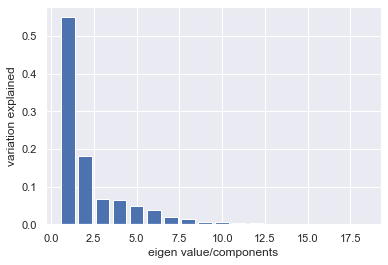

In [262]:
# PCA plot
plt.bar(list(range(1,19)),pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

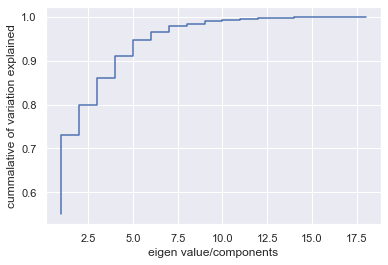

In [264]:
plt.step(list(range(1,19)),np.cumsum(pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

From above we can see that 8 dimension are able to explain 95%variance of data. so we will use first 8 principal components

In [265]:
# Use the first 8 principal components
pca_eight_components = PCA(n_components=8)
pca_eight_components.fit(new_vehicle_df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [266]:
# Transform the impute raw data which is in 18 dimension into 8 new dimension with pca
new_vehicle_df_pca_independent_attr = pca_eight_components.transform(new_vehicle_df_independent_attr_scaled)

In [268]:
# Display the shape of pca data set
new_vehicle_df_pca_independent_attr.shape

(793, 8)

In [271]:
raw1_vehicle_df = raw_vehicle_df.drop(['class'], axis=1)
X_pca = raw1_vehicle_df.iloc[:,:11]
y_pca = raw_vehicle_df['class']
X_pca_Train, X_pca_Test, y_pca_Train, y_pca_Test = train_test_split(new_vehicle_df_pca_independent_attr, new_vehicle_df_dependent_attr, test_size=0.3, random_state=40)
print("shape of rawdata_X_train",X_pca_Train.shape)
print("shape of rawdata_y_train",y_pca_Train.shape)
print("shape of rawdata_X_test",X_pca_Test.shape)
print("shape of rawdata_y_test",y_pca_Test.shape)

shape of rawdata_X_train (555, 8)
shape of rawdata_y_train (555,)
shape of rawdata_X_test (238, 8)
shape of rawdata_y_test (238,)


In [273]:
#fit the model on pca data with new dimension
svc.fit(X_pca_Train,y_pca_Train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [275]:
#predict the y value
y_pca_predict = svc.predict(X_pca_Test)

In [276]:
#display accuracy score of both models
from sklearn.metrics import accuracy_score
print("Accuracy score with raw scaled data(10 dimension)",accuracy_score(y_pca_Test,y_pca_predict))
print(classification_report(y_pca_Test,y_pca_predict))
print(accuracy_score(y_pca_Test,y_pca_predict))
print(confusion_matrix(y_pca_Test,y_pca_predict))

Accuracy score with raw scaled data(10 dimension) 0.9453781512605042
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       0.92      0.97      0.94        62
           2       0.91      0.91      0.91        57

    accuracy                           0.95       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

0.9453781512605042
[[113   2   4]
 [  1  60   1]
 [  2   3  52]]


<h5> Model Evaluation - SVM using Linear Kernel </h5>
From the above classification report, accuracy score and confusion matrix we can deduce the following:

***Model Performance***
<li>Accuracy is 95% </li>
<li>Precision is 95% </li>
<li>Recall is 95% </li>

<h3> MODEL COMPARISON </h3>

SVM: 0.635601 (0.039742)


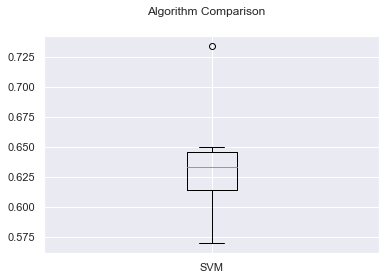

In [285]:
from sklearn import model_selection
models = []
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h3>CONCLUSION </h3>

From above we can see that SVM using PCA Accuracy is approx 95% almost the same using raw data. So there was no big difference. Howeversame level of accuracy was achieved just using 8 dimension where as rawdata used 18 dimension, which means less computing power.